In [1]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
#s
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)
# pandas 에서 데이터 뽑고, 말뭉치를 뽑아보면 통으로 분석 못 하니까 형태소로 나누는데 나눈 거 중에
#의미 있는 게 서술어, 나 콜라 먹었다.
#뽑아 내는 거 - wordcloud, konlpy



1.1.1
1.18.5


In [3]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내 글자수를 50개로 두고, head tail
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [4]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(3)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."
2,AU000001,Bond University,"Bond대학교는 휴양지로 유명한 골드코스트에 위치해있습니다. 서퍼스 파라다이스, 브...",학교 주변은 조용하고 깨끗한 평화로운 전원마을의 느낌입니다. 학교에서 5분정도 걸어...,거주형태는 크게 On Campus와 Off Campus로 나뉩니다. 저는 기숙사에 ...,"수업은 보통 4개의 수업을 듣습니다. 저는 Chinese1, Australian p...",교환생활 중 국제교육부와 연락할 일은 없었습니다. 교환학생을 가서 따로 국제교육부와...,학기초에 동아리 박람회식으로 여러 동아리들의 부스가 세워집니다. 관심 있는 동아리에...,특별히 culture shock이라기 보다는 정말 다양한 문화를 접하는 것 자체가 ...,"수업관련해서는 교수님께 질문을 해도 친절하게 알려주시고, 또 교내에 과제나 발표준비...",Bond와 그 동네를 생각하면 여유롭고 평화로웠던 분위기가 아직도 생생해요. 여기서...


In [5]:
df_ranking_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_wrangled.csv", encoding="utf-8")
df_ranking_specific.head(7)

,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,AF000001,AFGHANISTAN,Kabul University,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000001,ARGENTINA,Universidad Blas Pascal,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AR000002,ARGENTINA,Universidad Catolica de Cordoba,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AR000003,ARGENTINA,Universidad de Palermo,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4,AR000004,ARGENTINA,Universidad del Salvador,교환학생,ISEP,1.0,0.0,0.399670,0.00000,0.399670,0.119901,http://oia.yonsei.ac.kr/partner/expReport.asp?...
5,AR000005,ARGENTINA,University of Buenos Aires,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
6,AU000019,AUSTRALIA,Australian National University,교환학생,교환대학,27.0,17.0,17.952732,0.62963,0.664916,0.640216,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [6]:
df_ranking = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_ranking.csv", encoding="utf-8")
df_ranking.head(2)

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,376,CH000004,SWITZERLAND,University of Lausanne,교환학생,교환대학ISEP,8.0,8.0,6.659102,1.0,0.832388,0.949716,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,284,MX000004,MEXICO,Instituto Tecnologico y de Estudios Superiores...,교환학생,교환대학ISEP,7.0,7.0,5.665700,1.0,0.809386,0.942816,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [7]:
df_ranking.tail(2)

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
293,383,TW000005,TAIWAN,"National Taiwan University, College of Management",교환학생,교환대학,6.0,2.0,3.883967,0.333333,0.647328,0.427532,http://oia.yonsei.ac.kr/partner/expReport.asp?...
294,354,ES000017,SPAIN,Universitat Autonoma de Barcelona,교환학생,교환대학,7.0,0.0,4.854875,0.000000,0.693554,0.208066,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [8]:
df_ranking['국가'].value_counts()

UNITED STATES         116
JAPAN                  23
CANADA                 17
NETHERLANDS            14
UNITED KINGDOM         13
AUSTRALIA              13
FRANCE                 12
GERMANY                11
CHINA                  10
SPAIN                   7
AUSTRIA                 6
SWEDEN                  6
NEW ZEALAND             5
ITALY                   5
HONG KONG               5
TAIWAN                  4
FINLAND                 4
SWITZERLAND             3
RUSSIAN FEDERATION      3
SINGAPORE               3
THAILAND                2
IRELAND                 2
NORWAY                  2
DENMARK                 2
LITHUANIA               1
MEXICO                  1
ISRAEL                  1
CZECH REPUBLIC          1
POLAND                  1
BELGIUM                 1
TURKEY                  1
Name: 국가, dtype: int64

In [16]:
df_ranking_sw = df_ranking.loc[(df_ranking['국가'] == 'SPAIN')]
print(df_ranking_sw.shape)

(7, 13)


In [17]:
# pandas 설정: 각 column 별 (혹은 한 cell에서) 출력되는 글자수 제한을 없애기
pd.set_option('display.max_colwidth', None)

In [18]:
df_specific.isnull().sum()

대학코드            0
대학명             0
gen_info        0
env_info        1
food_info       2
study_info      0
office_info     8
facil_info      3
mhct_info      15
help_info      17
etc_info       16
dtype: int64

In [19]:
df_column = df_specific.fillna("")
df_column.head(0)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info


In [20]:
df_column.isnull().sum()

대학코드           0
대학명            0
gen_info       0
env_info       0
food_info      0
study_info     0
office_info    0
facil_info     0
mhct_info      0
help_info      0
etc_info       0
dtype: int64

In [127]:
import re
# removing junks from the string data
def remove_junk(str_data):
    str_data = str_data.replace("\\\\n", "") #slash n 이 엔터, 쓸데 없는 걸 없애는 거
    str_data = str_data.replace("\\n", "")
    str_data = str_data.replace("\n", "")
    str_data = str_data.replace("\\", "")
    str_data = str_data.replace("\\t", "")
    str_data = str_data.replace("NaN", "")

    # 한글, -english 빼고 전부 날리기
    # regex, regular expression, 특정 글자수 규칙 지정, 말고는 다 날림
    str_data = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', str_data)
    # replace multiple spaces into single space
    str_data = ' '.join(str_data.split()) #멀티플 스페이스를 싱글로 바꿈
    return str_data

In [128]:
gen_data= 'gen_info'
univ_code = "ES000017"

In [129]:
def access_univ_info(dataframe, column, univ_code):
    df_row = dataframe.loc[dataframe["대학코드"] == univ_code]
    str_univ_info = df_row[column].to_string(index=False).lstrip()
    str_univ_info = remove_junk(str_univ_info)
    return str_univ_info 

In [130]:
str_example = access_univ_info(df_specific, gen_data, univ_code)
str_example[:500] 

'이름에는 바르셀로나가 들어가 있지만 정작 바르셀로나 시에서 분 가량 거리에 있는 대학입니다 공항에서 택시를 타면 유로 가까이 나올 정도로 시 외곽에 자리 잡고 있습니다 까딸루냐 광장에서 FGC S 라인이나 S 라인을 타고 Universitat Autonoma de Barcelona역에서 내리면 바로 대학 중심으로 들어갈 수 있습니다 학교자체가 굉장히 넓고 학부 별로 건물이 따로 있기 때문에 먼저 가서 자신이 수업을 듣는 곳을 확인하는 것을 추천합니다 자신이 속한 학부 별로 교환학생 담당 사무실 또한 따로 있기 때문에 그것도 미리 확인해 두셔야 첫 주에 등록하러 갈 때 늦지 않고 갈 수 있습니다 교실 외에도 도서관들 체육 시설 International Student Services 프린트 할 수 있는 곳 약국 등이 다 뿔뿔이 흩어져 있기 때문에 꼭 미리 확인하셔야 처음에 허둥지둥하지 않을 것 같습니다 저는 년도 학기에 다녀왔기 때문에 바르 시내에서 분 떨어져있는 학교고 산과 가깝다보니'

In [131]:
# collecting all column values into one string 여러개의 카테고리별 후기를 하나로 대학으로
def column_to_string(dataframe, column_name: str):
    str_corpus = dataframe[column_name].to_string(index=False).lstrip()
    str_corpus = remove_junk(str_corpus)
    return str_corpus

In [132]:
# collecting all column values into one string
corpus = str_example
print("글자수:", len(corpus))
corpus[:1000]

글자수: 2539


'이름에는 바르셀로나가 들어가 있지만 정작 바르셀로나 시에서 분 가량 거리에 있는 대학입니다 공항에서 택시를 타면 유로 가까이 나올 정도로 시 외곽에 자리 잡고 있습니다 까딸루냐 광장에서 FGC S 라인이나 S 라인을 타고 Universitat Autonoma de Barcelona역에서 내리면 바로 대학 중심으로 들어갈 수 있습니다 학교자체가 굉장히 넓고 학부 별로 건물이 따로 있기 때문에 먼저 가서 자신이 수업을 듣는 곳을 확인하는 것을 추천합니다 자신이 속한 학부 별로 교환학생 담당 사무실 또한 따로 있기 때문에 그것도 미리 확인해 두셔야 첫 주에 등록하러 갈 때 늦지 않고 갈 수 있습니다 교실 외에도 도서관들 체육 시설 International Student Services 프린트 할 수 있는 곳 약국 등이 다 뿔뿔이 흩어져 있기 때문에 꼭 미리 확인하셔야 처음에 허둥지둥하지 않을 것 같습니다 저는 년도 학기에 다녀왔기 때문에 바르 시내에서 분 떨어져있는 학교고 산과 가깝다보니 시내에 비해서 겨울은 더 춥고 여름은 더 더운 편입니다 겨울에는 얇은 전기정판 꼭 챙겨오시는 걸 추천합니다 UAB는 엄밀히 말하면 바르셀로나 시와는 다른 시에 위치해 있고 대중교통으로 분 가량 걸리는 곳에 있습니다 바르셀로나 시내에서 산을 넘어야 학교가 위치해 있기 때문에 시내보다는 조금 추운 편이고 일교차가 큽니다 그래도 년 내내 기온이 영하로 떨어지는 일은 없으며 한낮에는 강한 태양 때문에 겨울에도 반팔과 반바지를 입고 다니는 친구들도 있습니다 바르셀로나자치대학은 종합대학이고 많은 학과들이 존재하기 때문에 캠퍼스 자체도 큰 편입니다 일반적인 한국의 대학교들처럼 한 캠퍼스에 여러 단과대학들이 있고 일부 예술 계열의 학과만 Sabadell 사바델 지역에 따로 캠퍼스가 있다고 들었습니다 기숙사도 학교 내부에 있어서 걸어서 수업을 갈 수는 있었으나 멀리 위치한 건물은 분 정도 걸어야 했던 것 같습니다 이 학교는 바르셀로나 도심에 위치하지 않고 까딸루냐 광장에서 페로까릴을 분 타고 와

In [133]:
info_list = ['gen_info', 'env_info', 'food_info', 'study_info', 'office_info', 'facil_info', 'mhct_info', 'help_info', 'etc_info']

In [134]:
es_example = access_univ_info(df_specific, info_list, univ_code)
es_example[:500] 

'gen info env info food info study info office info facil info mhct info help info etc info 이름에는 바르셀로나가 들어가 있지만 정작 바르셀로나 시에서 분 가량 거리에 있는 대학입니다 공항에서 택시를 타면 유로 가까이 나올 정도로 시 외곽에 자리 잡고 있습니다 까딸루냐 광장에서 FGC S 라인이나 S 라인을 타고 Universitat Autonoma de Barcelona역에서 내리면 바로 대학 중심으로 들어갈 수 있습니다 학교자체가 굉장히 넓고 학부 별로 건물이 따로 있기 때문에 먼저 가서 자신이 수업을 듣는 곳을 확인하는 것을 추천합니다 자신이 속한 학부 별로 교환학생 담당 사무실 또한 따로 있기 때문에 그것도 미리 확인해 두셔야 첫 주에 등록하러 갈 때 늦지 않고 갈 수 있습니다 교실 외에도 도서관들 체육 시설 International Student Services 프린트 할 수 있는 곳 약국 등이 다 뿔뿔이'

## Tokenizing with soynlp

In [135]:
# https://github.com/lovit/soynlp 문장을 쪼개는 방식. 쪼개진 거의 예시가 
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [136]:
tokened = tokenizer.tokenize(es_example)
tokened[:30]

['gen',
 'info',
 'env',
 'info',
 'food',
 'info',
 'study',
 'info',
 'office',
 'info',
 'facil',
 'info',
 'mhct',
 'info',
 'help',
 'info',
 'etc',
 'info',
 '이름에는',
 '바르셀로나가',
 '들어가',
 '있지만',
 '정작',
 '바르셀로나',
 '시에서',
 '분',
 '가량',
 '거리에',
 '있는',
 '대학입니다']

In [137]:
from collections import Counter

In [138]:
print(len(es_example)) 

21140


In [139]:
tokened_counted = Counter(tokened)
print("no. gen words:", len(tokened_counted))
com_words = tokened_counted.most_common(10)
com_words

no. gen words: 2850


[('때문에', 51),
 ('수', 49),
 ('있는', 46),
 ('저는', 38),
 ('있습니다', 36),
 ('것', 33),
 ('학교', 30),
 ('같습니다', 24),
 ('UAB', 24),
 ('기숙사', 24)]

In [140]:
min(tokened_counted, key=tokened_counted.get)

'gen'

In [141]:
### WORD2VEC

In [142]:
stopwords_kr = ['으로', '에서', '있는', '하는', '하고', '있습니다', '그리고','편입니다','아주','곳에','않습니다','좋습니다','않았습니다',
                '입니다', '어느', '하는데', '대체', '있으면', '최근', '좋은','은','있는데','주로',
                '라고', '봅니다', '해야', '있다고', '이라는', '합니다', '조금','굉장히','있으며','것이','갈','자주',
                '경우', '가능한', '하지만', '또한', '처럼', '있어', '보다', '꽤', '상당히',
                '되어', '이미', '그러나', '이루어지고', '이라', '위해', '되면', '와','를', '가지고',
                '이런', '까지', '하여', '우리', '어떤', '에게', '있지만', '해주는', '바로', '내내', '것을', '크게',
                '정도', '또는', '부터', '대해', '모든', '하기', '어떻게', '같습니다', 
                '이라고', '에는', '때문', '되고', '됩니다', '통해', '있을', '결국', '않은','훨씬','같아요','정도의','같습니다','버스를',
                '이를', '특히', '있도록', '대한', '가장', '이나', '에서는', '있고', 
                '같은', '에서도', '아닌', '다른', '따라', '되어야', '한다고', '다만', '볼','도','다'
                '이러한','해서', '관련', '생각', '하지', '않을까요', '약간', '되는', 
                '에선', '라는', '물론', '않을까', '하면', '아니라', '말씀', '에도', 
                '아니라', '부분', '분야', '많은', '여러', '향후', '기반', '행차', '할', '있어서',
                '그러면서', '되지만', '현재', '제가', '저는', '너무', '작은','ity','의','거의','정도로',
                '정말','그들','여타','없으므','완전','몇몇','만약','게다','이후','우선',
                '시쯤','후반','더욱','원하는','많을','몇개','분명','두어개', '하므', '수밖',
                '이','있','하','것','들','되','수','이','보','않','없','나','사람','주','아니','등','같',
                '우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그',
                '그것','두','말하','알','받','못하','일','에','4','10','5', '8','6','9','7','nn','대부분', '오는','꼭'
                '그런','또','문제','더','사회', '는','많이','n','1','2','3','있다','분',
                '많','좋','크','따르','중','나오','가지','씨','시키','만들','지금','생각하',
                '그러','속','하나','살','모르','적','월','데','자신','안','어떤','내','경우',
                '명','그녀','다시','이런','앞','보이','번','다른','어떻','여자','개','전','들',
                '사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓','큰','매우','때문에'] 

In [143]:
stops = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_kr.txt', encoding='utf').read()

In [173]:
stops = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_kr.txt', encoding='utf').read()
kr = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_nogada.txt', encoding='utf').read()

stops_ = stops + kr +'스페인'

In [174]:
keywords = []
for n in tokened: 
    if n not in stops_: 
        keywords.append(n)

In [175]:
common_keywords = Counter(keywords)
common_key_words = common_keywords.most_common(30)
common_key_words

[('UAB', 24),
 ('바르셀로나', 21),
 ('유로', 12),
 ('시내에', 12),
 ('인실', 10),
 ('info', 9),
 ('수업이', 9),
 ('보통', 9),
 ('시내에서', 8),
 ('없었습니다', 8),
 ('스페인어', 8),
 ('까딸루냐', 7),
 ('Bellaterra', 7),
 ('T', 7),
 ('스페인어를', 7),
 ('Univers', 6),
 ('등이', 6),
 ('편입니다', 6),
 ('바르셀로나는', 6),
 ('않았습니다', 6),
 ('학교의', 6),
 ('Sant', 6),
 ('많았습니다', 6),
 ('zone', 6),
 ('경우도', 6),
 ('빨리', 6),
 ('수업은', 6),
 ('비자', 6),
 ('시에서', 5),
 ('itat', 5)]

In [176]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [177]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
backgroundcolor = "white"
width=800
height=600
wordcloud = WordCloud(font_path = fontpath,
                        stopwords = set(stops_), 
                        background_color = backgroundcolor, 
                        max_words= 50,
                        max_font_size= 150,
                        width = width, 
                        height = height)

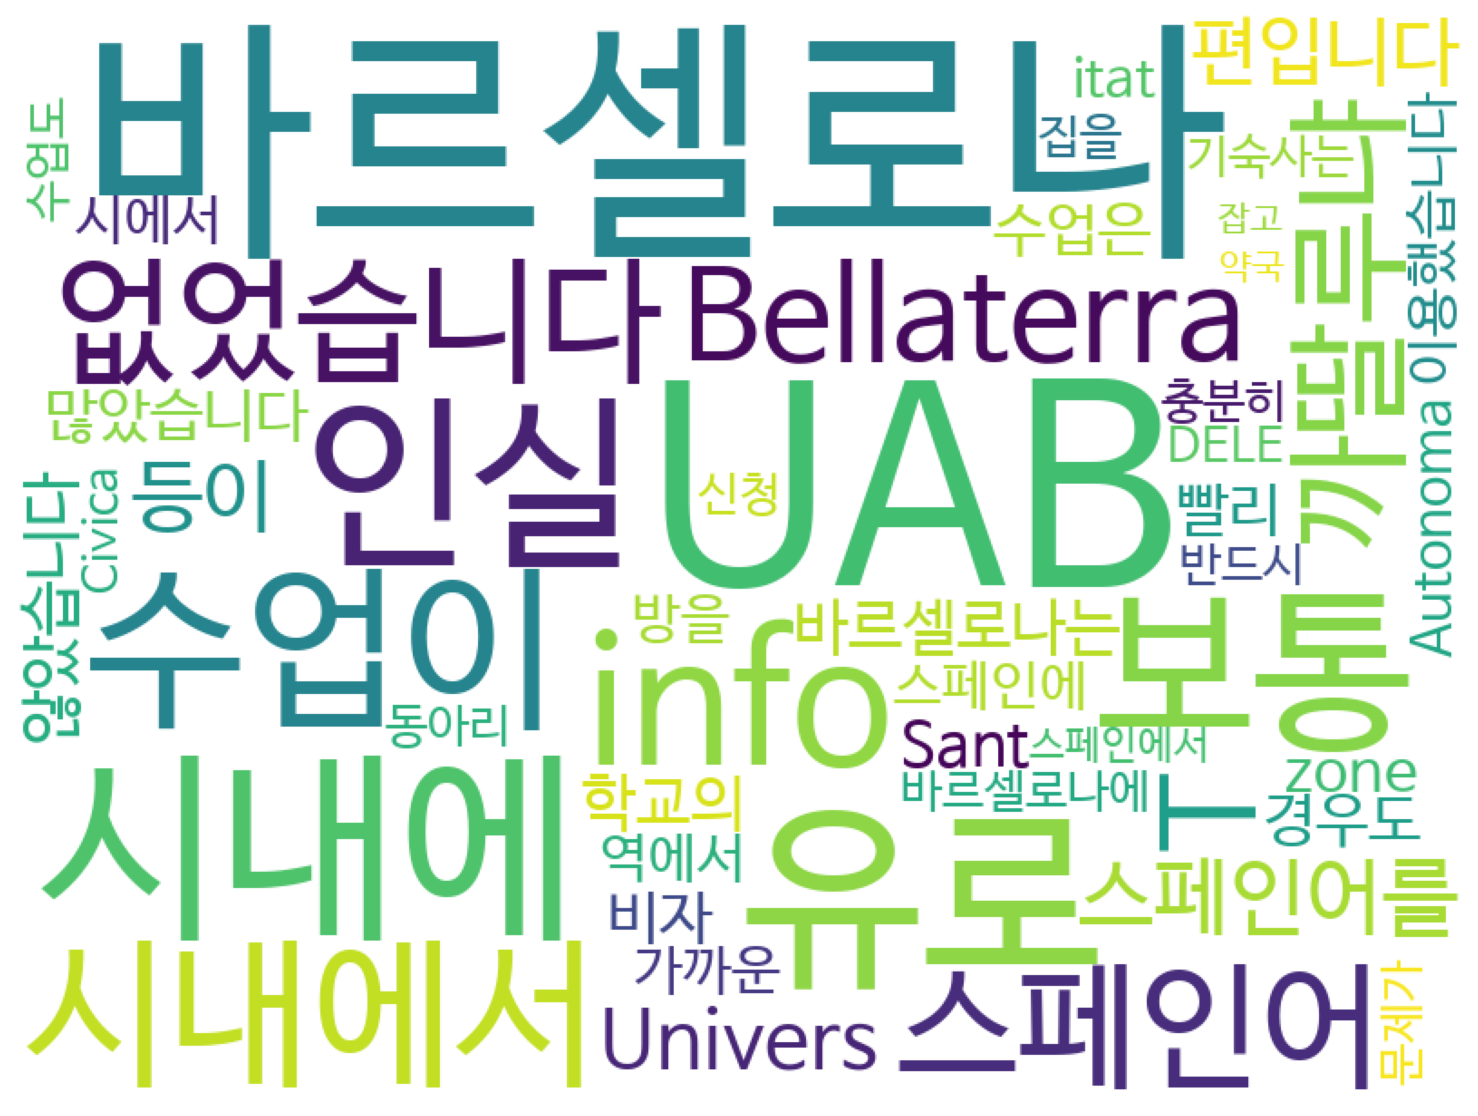

In [179]:
wordcloud.generate_from_frequencies(frequencies = common_keywords) # mecab으로 추출한 명사로 워드클라우드를 그린다.
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#이래서 전체 스탑워드 뽑은 다음에 각 학교에서 유니크한 거만 정리하는 식으로 하는 거..? 
#아니면 그냥 좋은 거에 대한 대학 0이랑 1 나눠서 그 대학들 키워드만 모아서 알아보기 그 때 그 때 스탑워드 처리.

In [151]:
word_list, frequency_list = map(list, zip(*com_words))
word_list[:10]

['때문에', '수', '있는', '저는', '있습니다', '것', '학교', '같습니다', 'UAB', '기숙사']

In [152]:
# https://github.com/lovit/soynlp
from soynlp.noun import LRNounExtractor

In [153]:
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(keywords)

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (365, 203) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 63 nouns are extracted


In [154]:
nouns_counted = Counter(nouns)
print("no. gen words:", len(nouns_counted))
common_nouns = nouns_counted.most_common(100)
common_nouns

no. gen words: 63


[('바르셀로나',
  NounScore_v1(frequency=37, score=0.9997351250000001, known_r_ratio=1.0)),
 ('시내',
  NounScore_v1(frequency=33, score=0.9995488148148148, known_r_ratio=0.9310344827586207)),
 ('인실',
  NounScore_v1(frequency=22, score=0.5980870833333333, known_r_ratio=1.0)),
 ('학교',
  NounScore_v1(frequency=20, score=0.5168388888888888, known_r_ratio=0.9)),
 ('스페인어',
  NounScore_v1(frequency=18, score=0.9994327777777777, known_r_ratio=1.0)),
 ('신청',
  NounScore_v1(frequency=14, score=0.7739864444444444, known_r_ratio=1.0)),
 ('이용',
  NounScore_v1(frequency=12, score=0.953578, known_r_ratio=0.6666666666666666)),
 ('가격',
  NounScore_v1(frequency=12, score=0.6906819166666667, known_r_ratio=1.0)),
 ('건물',
  NounScore_v1(frequency=11, score=0.5873663333333333, known_r_ratio=0.9)),
 ('거실',
  NounScore_v1(frequency=10, score=0.9171774999999999, known_r_ratio=1.0)),
 ('국제처',
  NounScore_v1(frequency=9, score=0.9996986666666667, known_r_ratio=0.8571428571428571)),
 ('마트',
  NounScore_v1(frequency=9, 

In [155]:
noun_extractor.lrgraph.get_r('날씨')

[('가', 2), ('도', 1), ('를', 1)]

In [164]:
noun_extractor.lrgraph.get_l('가')

[('문제', 5),
 ('들어', 2),
 ('시내', 2),
 ('학교', 2),
 ('기숙사', 2),
 ('날씨', 2),
 ('때', 2),
 ('우리', 2),
 ('동아리', 2),
 ('바르셀로나', 1)]

In [166]:
print((nouns['문제']))

NounScore_v1(frequency=9, score=0.8114515555555556, known_r_ratio=1.0)


In [167]:
from soynlp.noun import LRNounExtractor_v2

noun_extractor = LRNounExtractor_v2(verbose=True)
#noun_extractor.train(sents)
#nouns = noun_extractor.extract()
nouns_eo = noun_extractor.train_extract(keywords)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 2475 from 3288 sents. mem=0.247 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=3288, mem=0.251 Gb
[Noun Extractor] batch prediction was completed for 1058 words
[Noun Extractor] checked compounds. discovered 18 compounds
[Noun Extractor] postprocessing detaching_features : 352 -> 348
[Noun Extractor] postprocessing ignore_features : 348 -> 337
[Noun Extractor] postprocessing ignore_NJ : 337 -> 337
[Noun Extractor] 337 nouns (18 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.232 Gb                    
[Noun Extractor] 45.32 % eojeols are covered


In [168]:
nouns_counted_ = Counter(nouns_eo)
print("no. gen words:", len(nouns_counted_))
common_nouns_ = nouns_counted_.most_common(100)
common_nouns_

no. gen words: 337


[('스페인', NounScore(frequency=39, score=1.0)),
 ('시내', NounScore(frequency=34, score=1.0)),
 ('바르셀로나', NounScore(frequency=30, score=1.0)),
 ('수업', NounScore(frequency=27, score=1.0)),
 ('인실', NounScore(frequency=22, score=1.0)),
 ('역', NounScore(frequency=21, score=1.0)),
 ('스페인어', NounScore(frequency=18, score=1.0)),
 ('신청', NounScore(frequency=18, score=1.0)),
 ('이용', NounScore(frequency=17, score=1.0)),
 ('편', NounScore(frequency=16, score=1.0)),
 ('학교', NounScore(frequency=16, score=0.8571428571428571)),
 ('기숙사', NounScore(frequency=14, score=0.8666666666666667)),
 ('방', NounScore(frequency=13, score=1.0)),
 ('가격', NounScore(frequency=12, score=1.0)),
 ('말', NounScore(frequency=11, score=1.0)),
 ('동아리', NounScore(frequency=10, score=1.0)),
 ('건물', NounScore(frequency=10, score=1.0)),
 ('생각', NounScore(frequency=10, score=1.0)),
 ('마트', NounScore(frequency=10, score=1.0)),
 ('사용', NounScore(frequency=10, score=1.0)),
 ('거실', NounScore(frequency=10, score=1.0)),
 ('집', NounScore(freq

In [169]:
list(noun_extractor._compounds_components.items())[:50]

[('바르셀로나자치대학', ('바르셀로나', '자치대학')),
 ('시험기간', ('시험', '기간')),
 ('학교자체', ('학교', '자체')),
 ('연세대학교', ('연세대', '학교')),
 ('크기때문', ('크기', '때문')),
 ('대학생활', ('대학', '생활')),
 ('도시생활', ('도시', '생활')),
 ('출석체크', ('출석', '체크')),
 ('우리학교', ('우리', '학교')),
 ('학교생활', ('학교', '생활')),
 ('실내수영장', ('실내', '수영장')),
 ('소요시간', ('소요', '시간')),
 ('비치되어', ('비치', '되어')),
 ('교내식당', ('교내', '식당')),
 ('점심시간', ('점심', '시간')),
 ('노출되어', ('노출', '되어')),
 ('배정되어', ('배정', '되어')),
 ('하나하나', ('하나', '하나'))]